# Ebay Take Home Coding challenge
Author: Andrew Mendez,Email: aem336@cornell.edu

Description:

* One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the `vehicle might have serious issues that prevent it from being sold to customers.` The auto community calls these unfortunate purchases "kicks". Kicked cars often result when there are ``tampered odometers``, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle. Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.
    
* The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).

* Data Description:
    * The challenge of this competition is to `predict` if the car purchased at the Auction is a `good` / `bad` buy.
    * All the variables in the data set are defined in the file Carvana_Data_Dictionary.txt 
    * The data contains missing values 
    * The dependent variable (IsBadBuy) is binary (C2)
    * There are 32 Independent variables (C3-C34)
    * The data set is split to 60% training and 40% testing.

# Outline of report
## 1. Load and describe features
## 2. Visualize and Preprocess data
## 3. Train Several Models, report performance
## 4. Analysis of Best Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

## 1. Load and describe features


In [2]:
data = pd.read_csv("training.csv").fillna('0')
data.head(5)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597,12409,0,0,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374,12791,0,0,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146,8702,0,0,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375,5518,0,0,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739,7911,0,0,19638,33619,FL,4000.0,0,1020


## 2. Visualize and Preprocess data


### Some information about Datatype of features
* Auction: Categorical, string
* VehYear: categorical, int (year of vehicle)
* VehicleAge: categorial, int (how many years old since model made)
* Make: Categorical, String (Maker of Car)
* Trim: Categorial, string
* SubModel: Categorical, string
* MMRCurrentRetailAveragePrice: Continupus: float
* MMRCurrentRetailCleanPrice: contuinuous, float
* PRIMEUNIT: Categorical: string with NaN
* AUCGUART: Categorical: string with NaN
* BYRNO: ?, int
* VNZIP1: Categorial, int (zipcode)
* VNST: Categorical, string (state where vehicle is from?)
* VehBCost: continuous, float
* IsOnlineSale: categorical, int (binary maybe)
* WarrantyCost: continuous, float

## Clean data
* some columns are predominately NaN, some examples
    * PRIMEUNIT has three values{nan, 'NO', 'YES'} but NO or YES occur infrequently
    * AUCGUART has only two values {Nan,'GREEN', 'RED'}, GREEN and RED occur infrequently
    
    
I make a naive decision by setting NaN to a string '0'. Most NaN occur in categorical features, so label encoding will treat NaN as a seperate class

In [3]:
def plotHist(df,Col='Make'):
    a = pd.DataFrame({Col:df[df['IsBadBuy']==1][Col].unique(),
                 'Count':df[df['IsBadBuy']==1][Col].value_counts().tolist()})
    b = pd.DataFrame({Col:df[df['IsBadBuy']==0][Col].unique(),
                 'Count':df[df['IsBadBuy']==0][Col].value_counts().tolist()})
    fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
    g = sns.barplot(x=Col,y='Count',data=a,color='red', ax = axis1)
    g.legend(["IsBadBuy=1"])
    for item in g.get_xticklabels():
        item.set_rotation(90)
    h = sns.barplot(x=Col,y='Count',data=b,color='blue', ax = axis2)
    h.legend(["IsBadBuy=0"])
    for item in h.get_xticklabels():
        item.set_rotation(90)
    
    
    

## Details of datatype for all features

In [4]:
a = ['MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice','WarrantyCost','VehicleAge',]
for i in data.columns[3:32]:
    print(i,":",data[i].dtype,i in a)

Auction : object False
VehYear : int64 False
VehicleAge : int64 True
Make : object False
Model : object False
Trim : object False
SubModel : object False
Color : object False
Transmission : object False
WheelTypeID : object False
WheelType : object False
VehOdo : int64 False
Nationality : object False
Size : object False
TopThreeAmericanName : object False
MMRAcquisitionAuctionAveragePrice : object True
MMRAcquisitionAuctionCleanPrice : object True
MMRAcquisitionRetailAveragePrice : object True
MMRAcquisitonRetailCleanPrice : object True
MMRCurrentAuctionAveragePrice : object True
MMRCurrentAuctionCleanPrice : object True
MMRCurrentRetailAveragePrice : object True
MMRCurrentRetailCleanPrice : object True
PRIMEUNIT : object False
AUCGUART : object False
BYRNO : int64 False
VNZIP1 : int64 False
VNST : object False
VehBCost : float64 False


### Visualizing some categorocal features
* Here are some plots on categorocal features, comparing the counts of feature when example is a bad buy, or feature counts when sample is not bad buy

Note, I was planning on doing detailed statistical analysis, but for sake of time constraints, I did not want to go down the rabbit hole

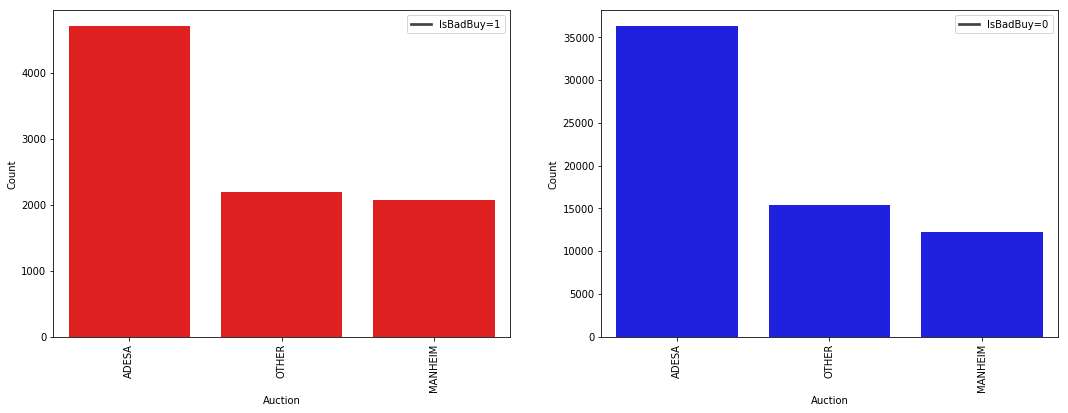

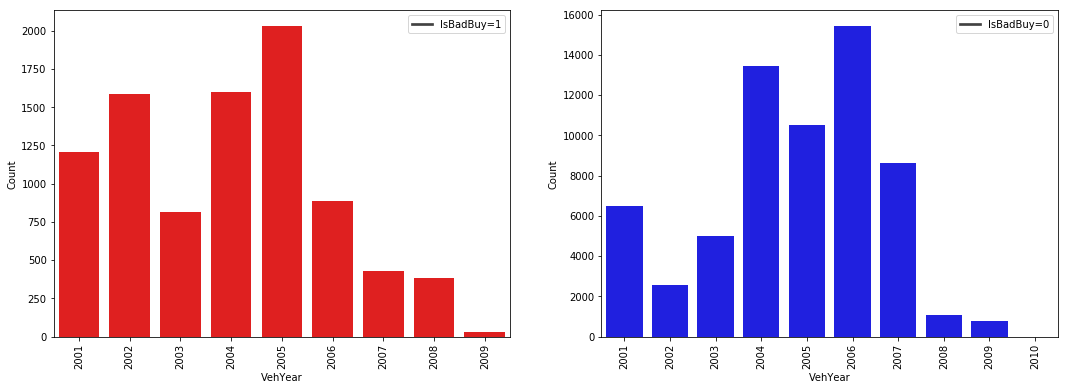

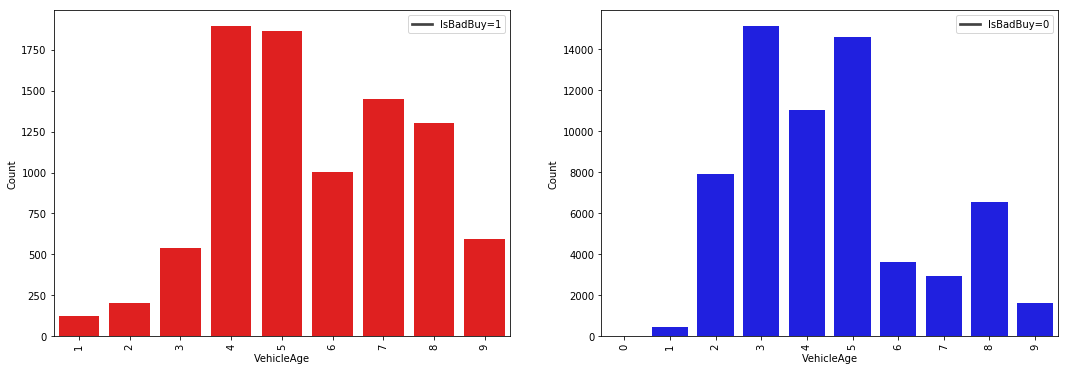

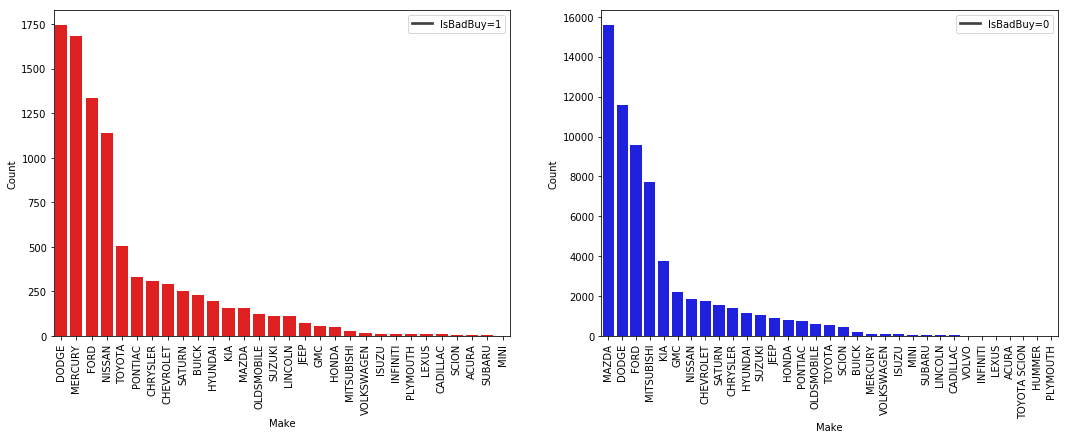

In [5]:
for i in data.columns.tolist()[3:7]:
    plotHist(data,Col=i)

### Visualizing some continuous features


In [20]:
# plotHist(data,Col='VehYear')
continuous_cols = [
'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice']

def plotHist_cont(df,col=None):
    if col!=None:
        fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
        g =sns.distplot(df[df["IsBadBuy"]==1][col].astype(float),color='red',ax=axis1)
        g.legend(["IsBadBuy=1"])
#         print(data[data["IsBadBuy"]==1][col].describe())
        for item in g.get_xticklabels():
            item.set_rotation(90)
        h = sns.distplot(df[df["IsBadBuy"]==0][col].astype(float),color='blue',ax=axis2)
        h.legend(["IsBadBuy=0"])
#         print(data[data["IsBadBuy"]==0][col].describe())
        for item in h.get_xticklabels():
            item.set_rotation(90)
        
        
        


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


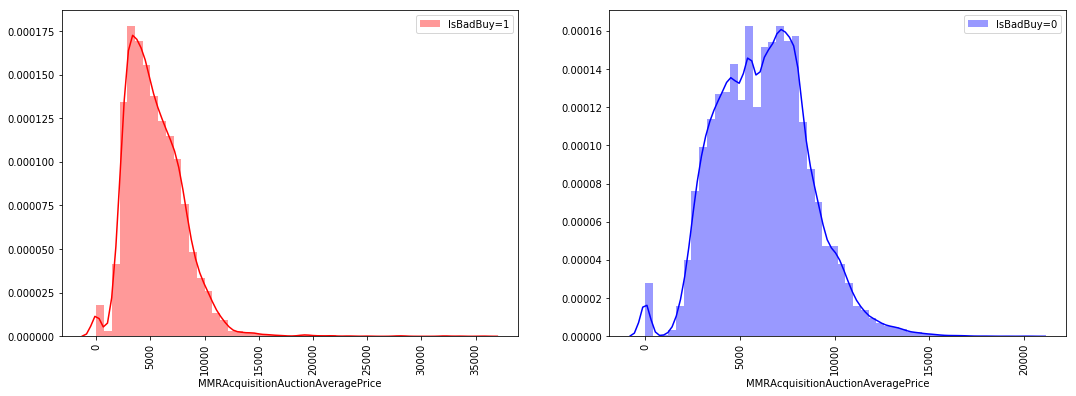

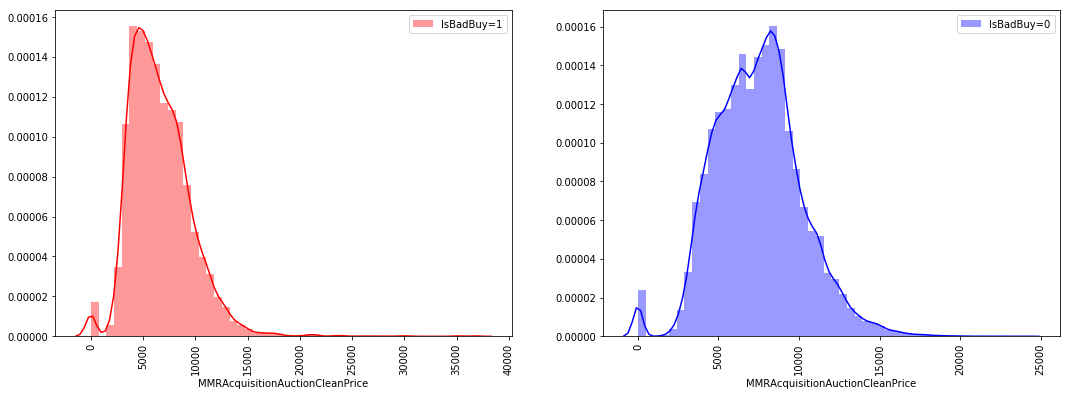

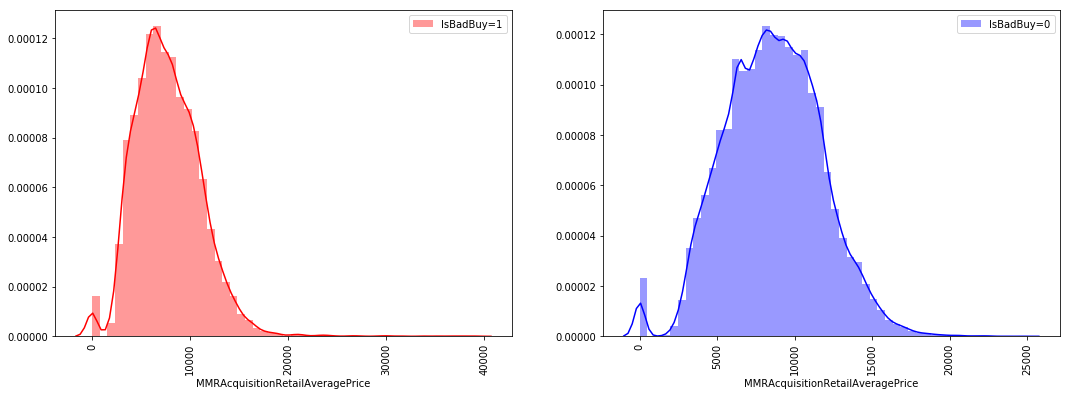

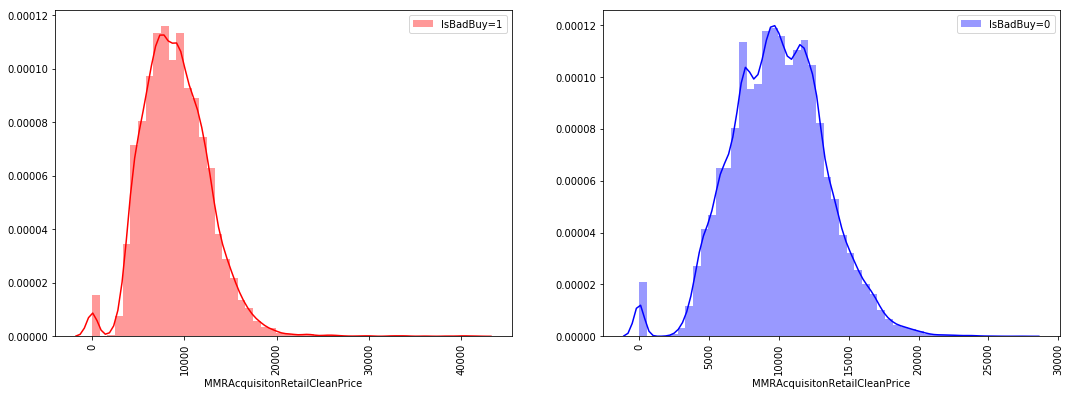

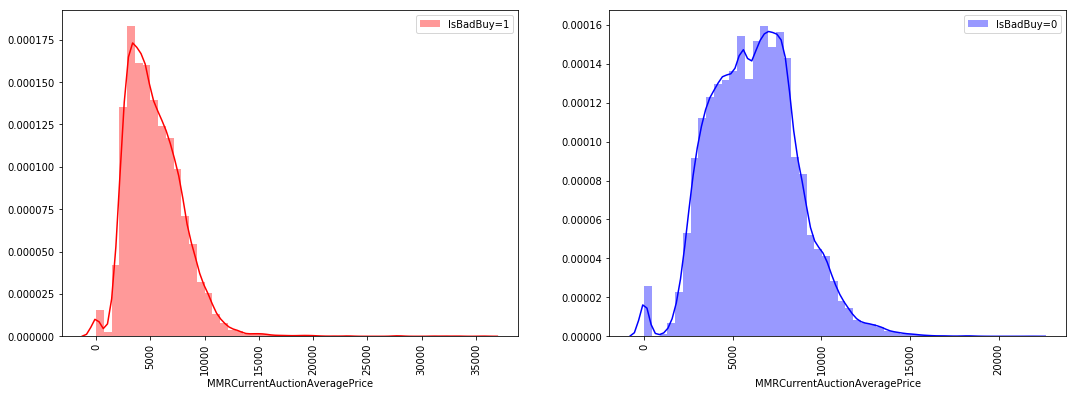

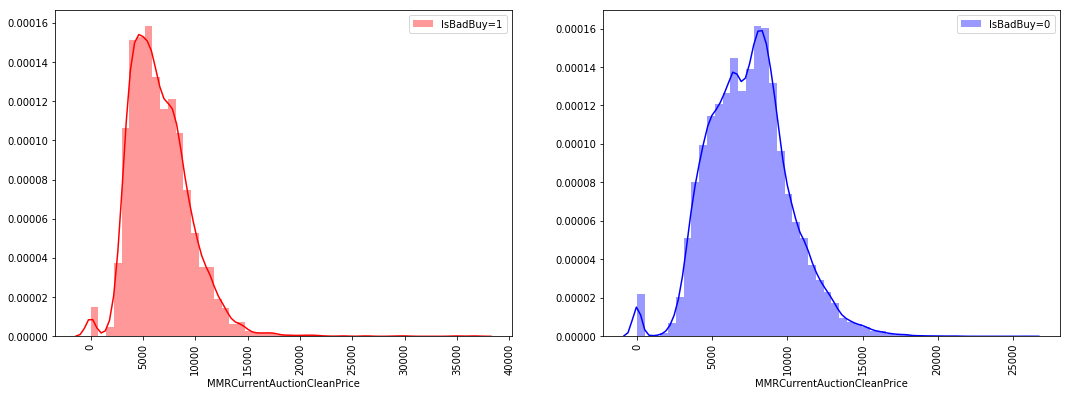

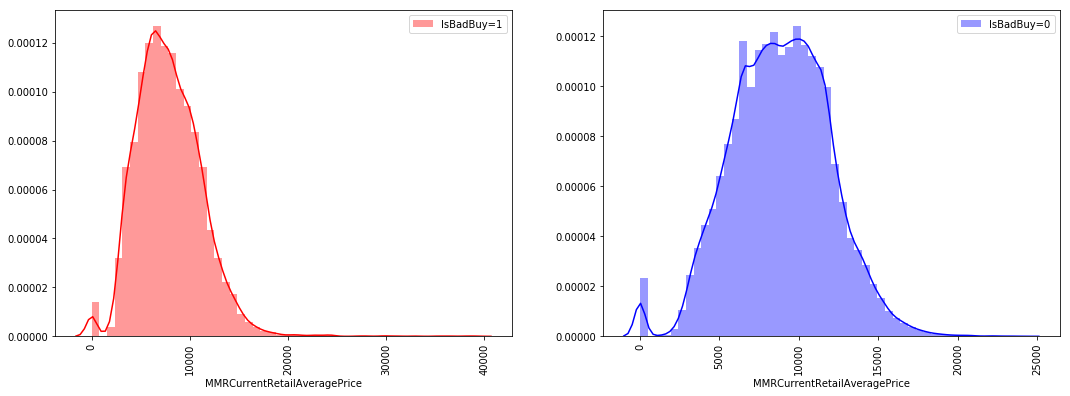

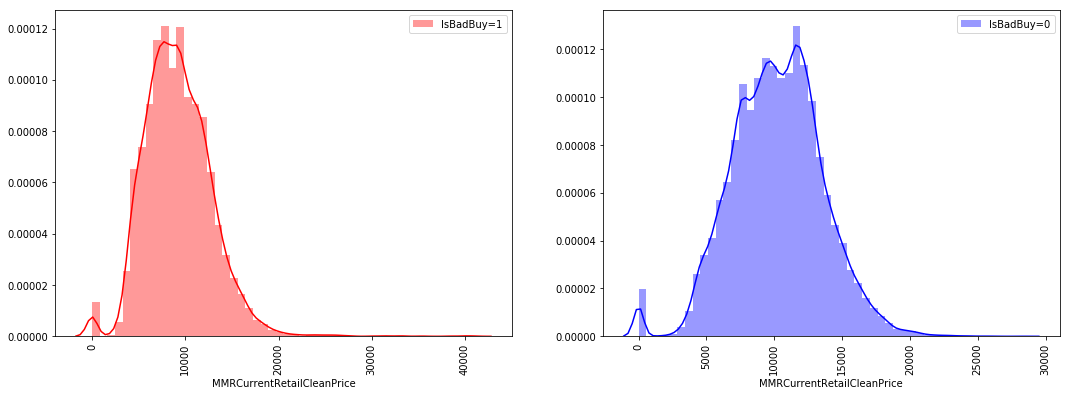

In [21]:
for i in continuous_cols:
    plotHist_cont(data,col=i)

### Frequency of Bad cars vs Good Cars
Graph shows below that 64k cars are good cars, an only 8.9k cars are good, may have imbalanced dataset

(array([64007.,  8976.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

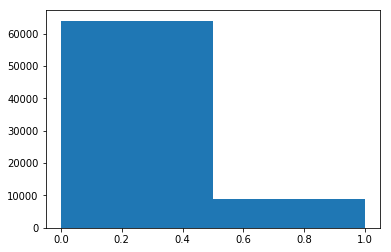

In [23]:
plt.hist(data["IsBadBuy"].tolist(),bins=2)

# Preprocess Data

I did simple preprocessing that given a list of labels that were most likely categorical values, I do label encoding on those features

In [24]:
def preprocess_data(data,a):
    '''
    Completes Label Encoding for features chosen that are categorical
    '''
    for i in data.columns[2:32]:
        if i not in a:
            data[i]=data[i].astype("category")
            data[i]=data[i].cat.codes
    return data

In [26]:
data = preprocess_data(data,a)


In [27]:
data.describe()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,...,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,255.902238,1.041955,4.343052,4.176644,8.859378,516.715783,56.208829,311.788129,...,5.811271,2.353575,0.047696,0.047929,46.079155,76.405231,16.582136,927.852418,0.025280,1276.580985
std,21077.241302,0.328425,149.456787,0.660214,1.731252,1.712210,7.839395,285.628708,37.233211,198.496571,...,2.819510,1.094385,0.217073,0.218626,17.146341,42.926251,12.500677,391.287996,0.156975,598.846788
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,462.000000
25%,18257.500000,0.000000,123.000000,1.000000,3.000000,3.000000,4.000000,309.000000,11.000000,153.000000,...,4.000000,1.000000,0.000000,0.000000,38.000000,35.000000,4.000000,629.000000,0.000000,837.000000
50%,36514.000000,0.000000,249.000000,1.000000,4.000000,4.000000,5.000000,487.000000,56.000000,243.000000,...,6.000000,3.000000,0.000000,0.000000,48.000000,88.000000,18.000000,920.000000,0.000000,1155.000000
75%,54764.500000,0.000000,386.000000,1.000000,6.000000,5.000000,13.000000,763.000000,83.000000,403.000000,...,7.000000,3.000000,0.000000,0.000000,58.000000,112.000000,31.000000,1201.000000,0.000000,1623.000000
max,73014.000000,1.000000,516.000000,2.000000,9.000000,9.000000,32.000000,1062.000000,134.000000,863.000000,...,12.000000,4.000000,2.000000,2.000000,73.000000,152.000000,36.000000,2071.000000,1.000000,7498.000000


### Potential Issue: Categorical Features with High Cardinality

Here we vizualize the distribution of some features that underwent with label encoding

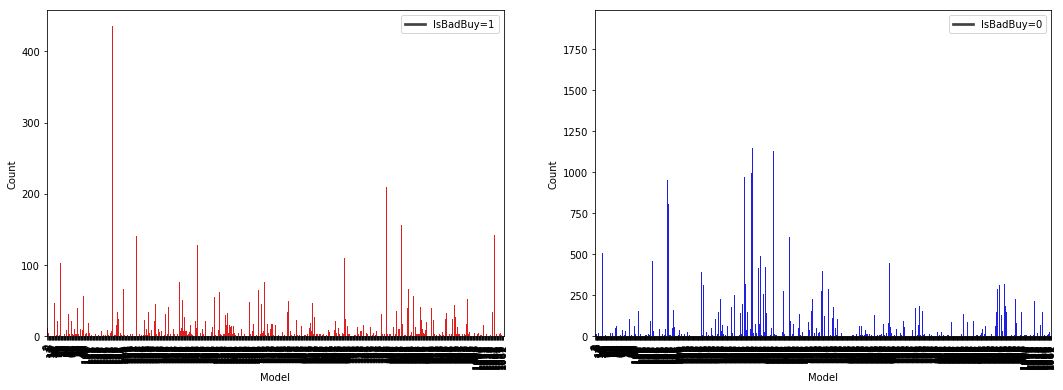

In [28]:
plotHist(data,Col='Model')

This graph shows that some features, such as the Model of the car, after label encoding has high cardinality

It turns out several categorical features have high cardinality after label encoding:
* SubModel: 863 categories
* Trim: 134 categories
* BYRNO: 73 categories
* VNZIP1: 152 categories
*  Model: 1062 categories
    
This may cause an issue as higher dimensions make classification harder

In [55]:
#making simple data structures to make accessing feature names easier
l =data[data.columns[2:32]].columns.tolist()
name_to_index = {l[i]:i for i in range(len(l))}
index_to_name = {k:v for v,k in name_to_index.items()}

### Converting dataframe to matrices

In [30]:
X = data[data.columns[2:32]].as_matrix().astype(float)
y = data['IsBadBuy'].as_matrix()


## 3. Train Several Models, report performance

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC ,SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_curve,auc

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Note: The test set (Test.csv) does not have IsBadBuy column, so have no labels to compare accuracy. Will split the training.csv into train and dev to get better understanding of accuracy

Here we are doing a 77%, 33% training, dev split on the training data

In [33]:
X_tr, X_dev, y_tr, y_dev = train_test_split( X, y, test_size=0.33, random_state=42)

# Models

## Baseline: Logistic Regression
[What does this algorithm do?]Algorithm that finds the best parameters to fit a non-linear function[What are some pros and cons]

Note: To prevent underfitting when training, I run 5-fold cross validation to see if there are any issues with underfitting 

In [34]:
def get_logreg_results(X_train, X_test, y_train, y_test):
    print("Training Logistic Regression")
    clf = LogisticRegression()
    skf = StratifiedKFold(n_splits=5)
    
    scores = []
    f = 0
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_t = X_train[train_index], X_train[test_index]
        y_tr, y_t = y_train[train_index], y_train[test_index]
        
        clf.fit(X_tr, y_tr)
        scores.append(clf.score(X_t, y_t))
        print("Fold {}: {}".format(f+1, scores[-1]))
        f+=1
    print("Logistic cross-validation accuracy: {}".format(np.mean(scores)))
    
    clf.fit(X_train, y_train)
    print("Logistic accuracy on the dev set: {}".format(accuracy_score(y_test, clf.predict(X_test))))
    return [accuracy_score(y_test, clf.predict(X_test)), f1_score(y_test,clf.predict(X_test))]

In [35]:
acc,f1 = get_logreg_results(X_tr,X_dev, y_tr, y_dev)
print("Acc: ",acc,"F1: ",f1)

Training Logistic Regression
Fold 1: 0.8902862985685072
Fold 2: 0.8962167689161554
Fold 3: 0.8924335378323108
Fold 4: 0.8936605316973415
Fold 5: 0.8766618940478625
Logistic cross-validation accuracy: 0.8898518062124354
Logistic accuracy on the dev set: 0.8902221299564044
Acc:  0.8902221299564044 F1:  0.2454337899543379


## Naive Bayes
The challenge gives us the clue that many columns are independent of eachother, Naive Bayes does well when features are independent of eachother

FIX: [Rather than comparing correlation done in logistic regression, we can compute the probability of each class, and compare them]

In [36]:
def get_nb_results(X_train, X_test, y_train, y_test):
    print("Training Bernoulli Naive Bayes")
    clf = BernoulliNB()
    skf = StratifiedKFold(n_splits=5)
    
    scores = []
    f = 0
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_t = X_train[train_index], X_train[test_index]
        y_tr, y_t = y_train[train_index], y_train[test_index]
        
        clf.fit(X_tr, y_tr)
        scores.append(clf.score(X_t, y_t))
        print("Fold {}: {}".format(f+1, scores[-1]))
        f+=1
    print("NB cross-validation accuracy: {}".format(np.mean(scores)))
    
    clf.fit(X_train, y_train)
    print("NB accuracy on the dev set: {}".format(accuracy_score(y_test, clf.predict(X_test))))
    return [accuracy_score(y_test, clf.predict(X_test)), f1_score(y_test,clf.predict(X_test))]

In [37]:
acc,f1 = get_nb_results(X_tr, X_dev, y_tr, y_dev)
print("Acc: ",acc,"F1: ",f1)

Training Bernoulli Naive Bayes
Fold 1: 0.8967280163599182
Fold 2: 0.8958077709611452
Fold 3: 0.8923312883435582
Fold 4: 0.895398773006135
Fold 5: 0.8945592145633053
NB cross-validation accuracy: 0.8949650126468123
NB accuracy on the dev set: 0.8952460037367657
Acc:  0.8952460037367657 F1:  0.36877658243682765


## Random Forests

fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [42]:
def get_random_forests_results(X_train, X_test, y_train, y_test):
    print("Training  Random Forests")
    clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,verbose=1)
    skf = StratifiedKFold(n_splits=5)
    
    scores = []
    f = 0
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_t = X_train[train_index], X_train[test_index]
        y_tr, y_t = y_train[train_index], y_train[test_index]
        
        clf.fit(X_tr, y_tr)
        scores.append(clf.score(X_t, y_t))
        print("Fold {}: {}".format(f+1, scores[-1]))
        f+=1
    print("RF cross-validation accuracy: {}".format(np.mean(scores)))
    
    clf.fit(X_train, y_train)
    print("RF accuracy on the dev set: {}".format(accuracy_score(y_test, clf.predict(X_test))))
    return [accuracy_score(y_test, clf.predict(X_test)), f1_score(y_test,clf.predict(X_test)),clf]

In [43]:
acc,f1,random_forests = get_random_forests_results(X_tr, X_dev, y_tr, y_dev)
print("Acc: ",acc,"F1: ",f1)

Training  Random Forests


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Fold 1: 0.9019427402862986


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Fold 2: 0.900715746421268


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Fold 3: 0.8982617586912065


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Fold 4: 0.9


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Fold 5: 0.9000818163223563
RF cross-validation accuracy: 0.9002004123442259


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


RF accuracy on the dev set: 0.9014324268216732


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


Acc:  0.9014324268216732 F1:  0.381126173096976


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


## Summary of accuracies
* Log Reg: 5-fold train acc = `0.89`, dev acc = `0.89`, f1 = `0.24`
* Naive Bayes: 5-fold train acc= `0.895`, dev acc = `0.895`, f1 = `0.362`
* Random Forests: 5-fold train acc= `0.901`, dev acc = `0.901` , f1 = `0.381`

## Result:

Looking at the accuracies and f1 score, we can see that Random Forests is the best performing model. Even though all models get high accuracy, accuracy does not reflect overall performance. F1 is a weight average of precision and recall, so we can see that Random Forests has the highest f1 score. 

## 4. Analysis of Best Model

## Check for overfitting using ROC curve

In [49]:
y_pred = random_forests.predict(X_dev)
f1 = f1_score(y_dev,y_pred)
fpr,tpr,_=roc_curve(y_dev,y_pred)
roc_auc = auc(fpr, tpr)


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


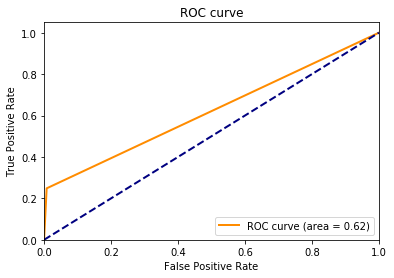

In [50]:
### plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## Plotting what features are important in Random Forests Classiciation
Gives insight into what features are important in general to determin bad sell or good sell

In [53]:
importances = random_forests.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forests.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]-2):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 11 (0.077235)
2. feature 10 (0.073638)
3. feature 12 (0.057716)
4. feature 29 (0.055247)
5. feature 0 (0.052121)
6. feature 17 (0.046531)
7. feature 16 (0.046111)
8. feature 21 (0.045460)
9. feature 23 (0.045305)
10. feature 20 (0.045012)
11. feature 22 (0.044990)
12. feature 18 (0.044635)
13. feature 27 (0.043830)
14. feature 19 (0.043532)
15. feature 26 (0.037547)
16. feature 5 (0.031768)
17. feature 7 (0.028066)
18. feature 8 (0.027426)
19. feature 28 (0.027264)
20. feature 6 (0.024376)
21. feature 1 (0.019279)
22. feature 3 (0.018852)
23. feature 4 (0.017433)
24. feature 2 (0.014342)
25. feature 14 (0.012878)
26. feature 15 (0.008871)
27. feature 13 (0.003599)
28. feature 9 (0.002599)


In [56]:
best_features = [index_to_name[i] for i in indices]

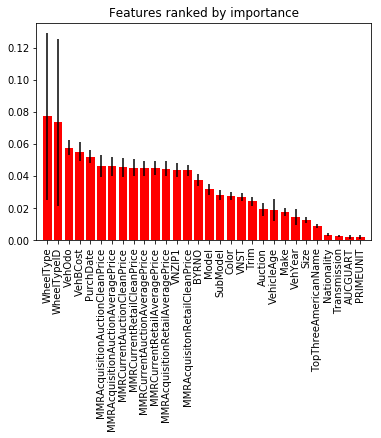

In [57]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Features ranked by importance")
plt.bar(range(len(importances)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(best_features)), best_features,rotation='vertical')

plt.xlim([-1, X_tr.shape[1]])
plt.show()

The feature important makes sense, as a top feature is Vehicle Odometer value, which is a common feature that helps pick out a bad buy kick car

# Next Steps if had more time
* Hyperparameter optimization with Random Forests
* Analyze ROC curve to see what issue we are dealing with that we have low f1
* Reduce cardinality of categorical values when doing label encoding
    * I think high cardinality in label encoding may be the issue our precision/recall is bad, bettr categorization of categorical features can help
* Go through continuous features and remove outliers
* Analyze top features and gain insights into how they help classification so well